In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from rt_utils import RTStructBuilder
from vlkit.medical import read_dicom_data, read_dicoms
from rt_utils.image_helper import get_pixel_to_patient_transformation_matrix, apply_transformation_to_3d_points
from vlkit.image import normalize

In [2]:
#rtstruct_t2  = RTStructBuilder.create_new(dicom_series_path="data/10042_1_003Tnq2B/t2")
#rtstruct_ktrans  = RTStructBuilder.create_new(dicom_series_path="data/10042_1_003Tnq2B/ktrans")

In [3]:
def get3d(path):
    images = read_dicoms(path)
    intensities = np.concatenate(([i.pixel_array[None, :, :] for i in images]), axis=0)
    h, w = images[0].pixel_array.shape
    slices = len(images)
    x = np.arange(w)
    y = np.arange(h)
    x, y = np.meshgrid(x, y)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    mat = get_pixel_to_patient_transformation_matrix(images)
    points = np.concatenate((x, y), axis=1)
    voxels = []
    for i in range(slices):
        p = np.concatenate((points, np.full((len(points), 1), i)), axis=1)
        v = apply_transformation_to_3d_points(p, mat)
        v = v.reshape(h, w, v.shape[-1])
        voxels.append(v)
    voxels = np.array(voxels)
    return voxels, intensities

t2voxels, t2intensities = get3d('data/t2')
ktrans_voxels, ktrans_intensities = get3d('data/ktrans')

In [4]:
t2voxels.reshape(20, -1).shape

(20, 307200)

In [7]:
def sample_voxels(voxels, intensities, n=1000):
    intensities = normalize(intensities, 0, 1)
    slices, h, w = intensities.shape
    coords = np.zeros((slices, n, 3)) # 3: x y z
    colors = np.ones((slices, n, 3)) # 3: rgb
    voxels = voxels.reshape(slices, -1, 3)
    intensities = intensities.reshape(slices, -1)
    for i in range(slices):
        indice = np.random.choice(h*w, n)
        coords[i] = voxels[i, indice]
        colors[i] = intensities[i, indice][:, None]
    return coords, colors
        
    

TypeError: object of type 'numpy.bool_' has no len()

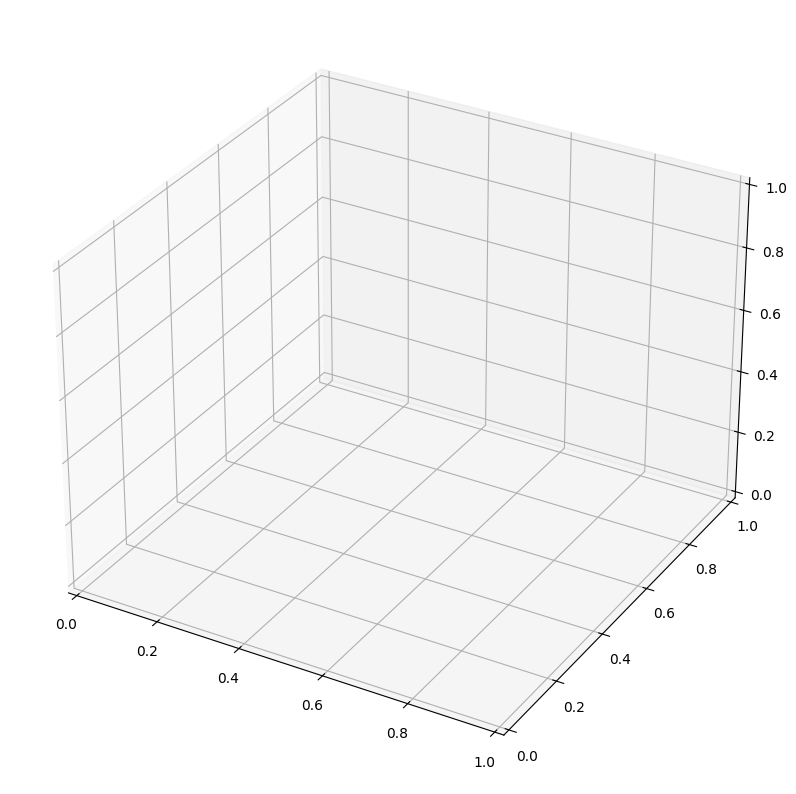

In [23]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')


# sample some voxles for visualization
v, c = sample_voxels(t2voxels, t2intensities, n=50000)
# visualize the first slice
s = 0

if c.any():
    ax.scatter(v[s, :, 0], v[s, :, 1], v[s, :, 2], color=c[s])
# visualize the last slice
s = -1

print(c[-1].shape)

#ax.scatter(v[s, :, 0], v[s, :, 1], v[s, :, 2], color=c[s])





(20, 50000, 3)


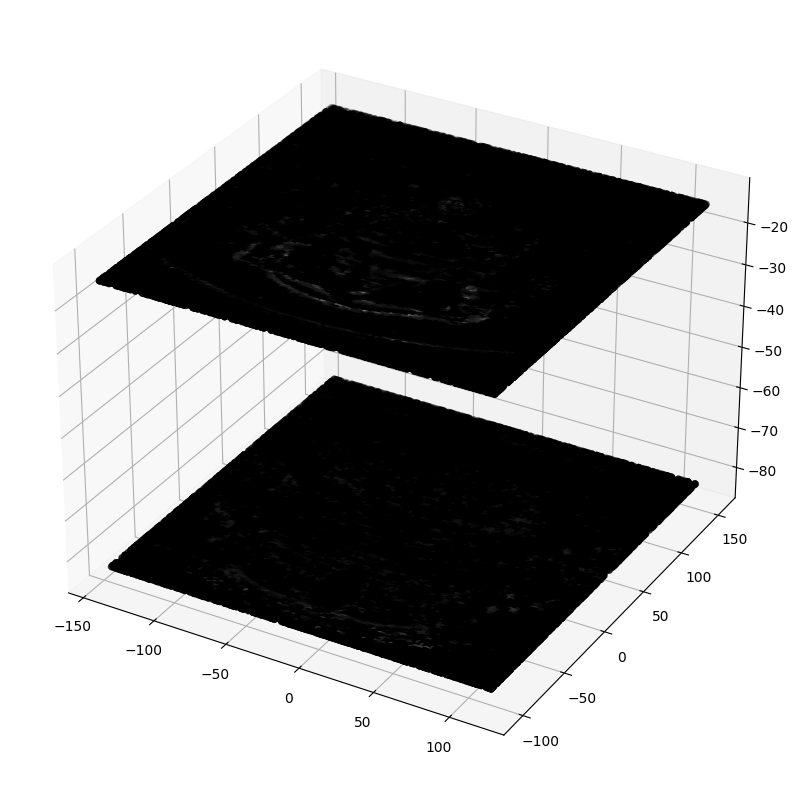

In [89]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(projection='3d')

# sample some voxles for visualization
v, c = sample_voxels(ktrans_voxels, ktrans_intensities, n=50000)
print(v.shape)
# visualize the first slice
s = 0
if (v[s, :, 0] > 0).any():
    ax.scatter(v[s, :, 0], v[s, :, 1], v[s, :, 2], color=c[s])
# visualize the last slice
s = -1

ax.scatter(v[s, :, 0], v[s, :, 1], v[s, :, 2], color=c[s])